<a href="https://colab.research.google.com/github/yesong98/Exploration/blob/main/Exploration2(%EC%99%84%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# 1. 프로젝트 1 :손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

In [118]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [119]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [120]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


#### (2) 모델에 입력할 데이터 X 준비하기

In [121]:
df_x = diabetes.data


#### (3)모델에 예측할 데이터 y 준비하기

In [122]:
df_y = diabetes.target

In [123]:
# 입력과 타깃 데이터의 크기 확인
print(df_x.shape)
print(df_y.shape)
# target은 442개의 요소를 가진 1차원 배열
# 행은 샘플(sample), 열은 샘플의 특성(feature)
# 샘플이란 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트를 의미
# 특성은 당뇨병 데이터의 여러 특징들을 의미한다.
# 당뇨병 데이터에는 나이, 성별, bmi, bp등의 특징이  있다.

(442, 10)
(442,)


In [124]:
print('<df_x[0]> : ',df_x[0])
print()
print('<df_y[0]> : ',df_y[0] )

<df_x[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<df_y[0]> :  151.0


#### (4) train 데이터와 test 데이터로 분리하기

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


#### (5) 모델 준비하기

In [126]:
#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("슝=3")

슝=3


In [127]:
W

array([0.90511759, 0.77878774, 0.12480513, 0.14638625, 0.69441714,
       0.92230527, 0.97258768, 0.06902534, 0.49077329, 0.52552227])

In [128]:
b

0.8393545491076482

In [129]:
#모델 함수를 구현해주세요.
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


#### (6) 손실함수 loss 정의하기

In [130]:
#손실함수를 MSE 함수로 정의해주세요.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print('슝=3')

슝=3


In [131]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print('슝=3')

슝=3


### (7) 기울기를 구하는 gradient 함수 구현하기

In [132]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3


In [133]:
def gradient(X, W, b,y):
    N = len(W)

    y_pred = model(X,W,b)

    dW=1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db
print('슝=3')

슝=3


In [134]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


### (8) 하이퍼 파라미터인 학습률 설정하기

In [135]:
#학습률, learning rate 를 설정해주세요
LEARNING_RATE = 0.01

### (9) 모델 학습하기

In [136]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21362.3615
Iteration 20 : Loss 15909.0597
Iteration 30 : Loss 12218.3963
Iteration 40 : Loss 9709.2273
Iteration 50 : Loss 7993.1061
Iteration 60 : Loss 6810.2679
Iteration 70 : Loss 5986.8935
Iteration 80 : Loss 5406.5798
Iteration 90 : Loss 4991.2907
Iteration 100 : Loss 4688.6381
Iteration 110 : Loss 4463.3876
Iteration 120 : Loss 4291.7851
Iteration 130 : Loss 4157.7660
Iteration 140 : Loss 4050.4225
Iteration 150 : Loss 3962.3099
Iteration 160 : Loss 3888.3133
Iteration 170 : Loss 3824.8897
Iteration 180 : Loss 3769.5599
Iteration 190 : Loss 3720.5673
Iteration 200 : Loss 3676.6492
Iteration 210 : Loss 3636.8825
Iteration 220 : Loss 3600.5795
Iteration 230 : Loss 3567.2178
Iteration 240 : Loss 3536.3918
Iteration 250 : Loss 3507.7805
Iteration 260 : Loss 3481.1242
Iteration 270 : Loss 3456.2092
Iteration 280 : Loss 3432.8570
Iteration 290 : Loss 3410.9156
Iteration 300 : Loss 3390.2549
Iteration 310 : Loss 3370.7617
Iteration 320 : Loss 3352.3369
Iteration 330 

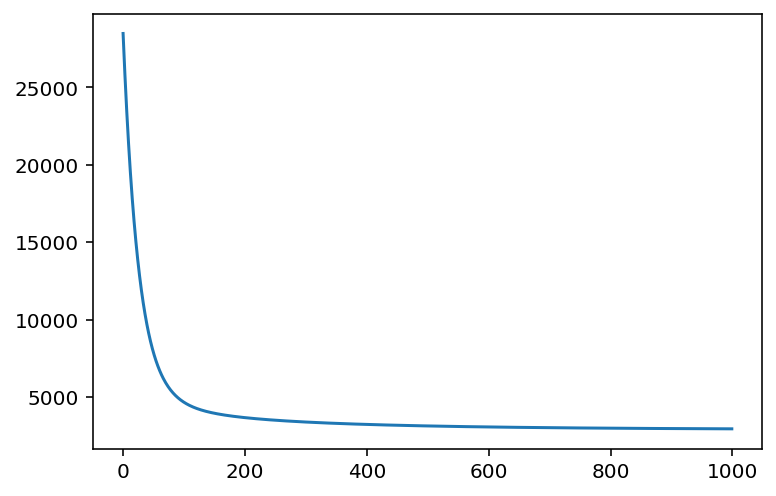

In [137]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [138]:
W, b

(array([  48.3482537 , -169.9578944 ,  470.4843923 ,  306.5187465 ,
         -51.6262971 ,  -99.80880001, -209.7410817 ,  145.04708309,
         350.99014396,  133.0678001 ]), 151.49120903351525)

### (10) test 데이터에 대한 성능 확인하기

In [139]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2867.20274155922

### (11) 정답 데이터와 예측한 데이터 시각화하기

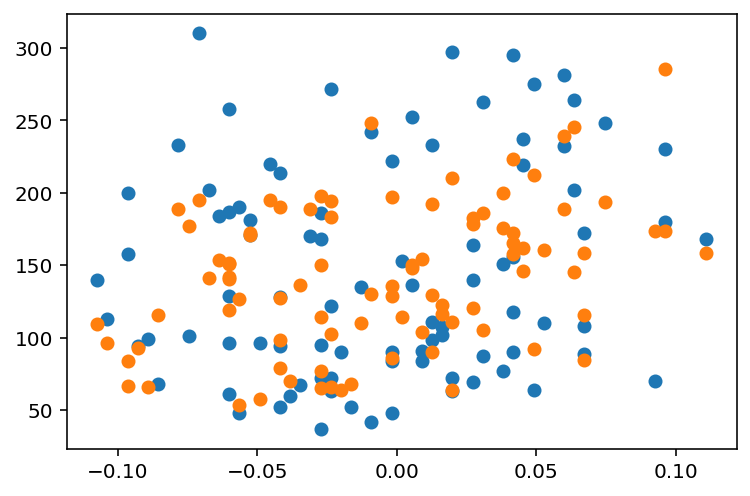

In [140]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 2.프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? 

##### (1) 데이터 가져오기

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
filename = '/content/drive/My Drive/ex2.2/train.csv'

bike_df = pd.read_csv(filename)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [144]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [145]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [146]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


###### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [147]:
# datetime 타입에서 년, 월, 일, 시간, 분, 초 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df['minute'] = bike_df.datetime.apply(lambda x : x.minute)
bike_df['second'] = bike_df.datetime.apply(lambda x : x.second)
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [148]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


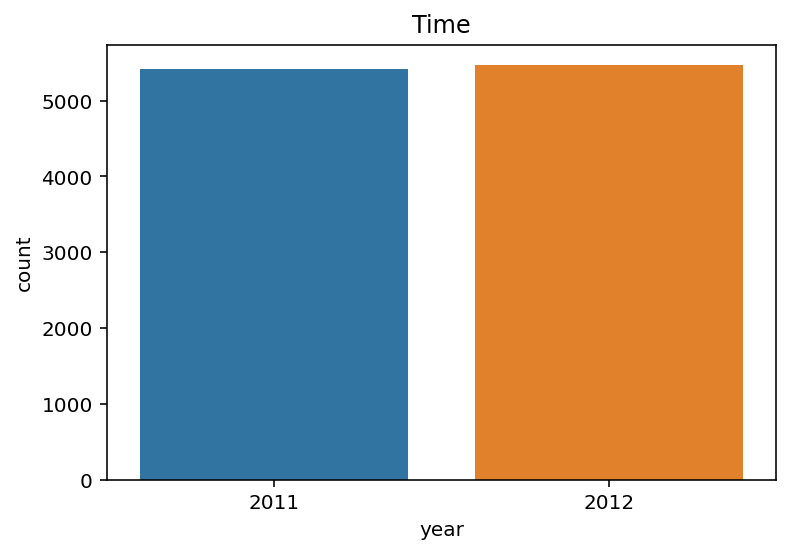

In [149]:
sns.countplot(x="year", data=bike_df)
plt.title("Time")
plt.show()

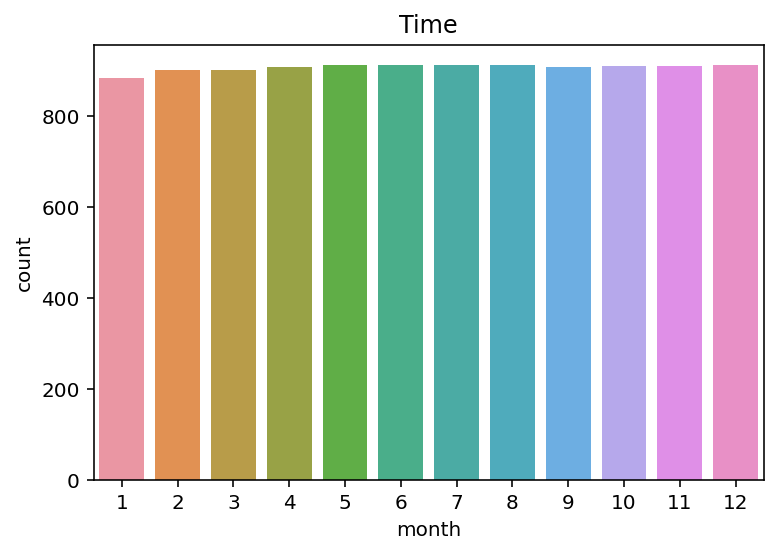

In [150]:
sns.countplot(x="month", data=bike_df)
plt.title("Time")
plt.show()

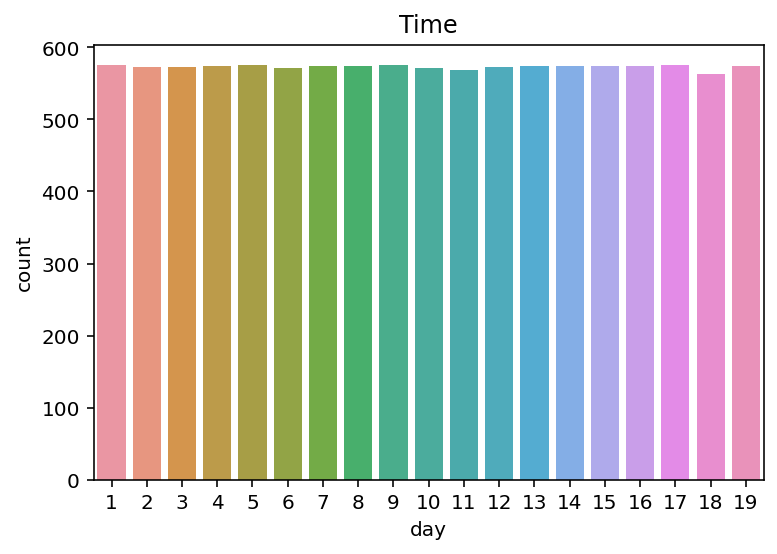

In [151]:
sns.countplot(x="day", data=bike_df)
plt.title("Time")
plt.show()

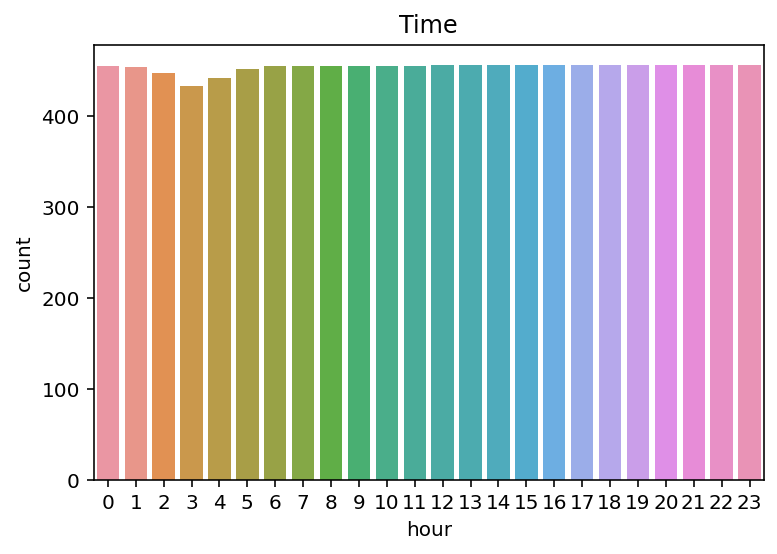

In [152]:
# 차트 세로로 그리기
sns.countplot(x="hour", data=bike_df)
plt.title("Time")
plt.show()

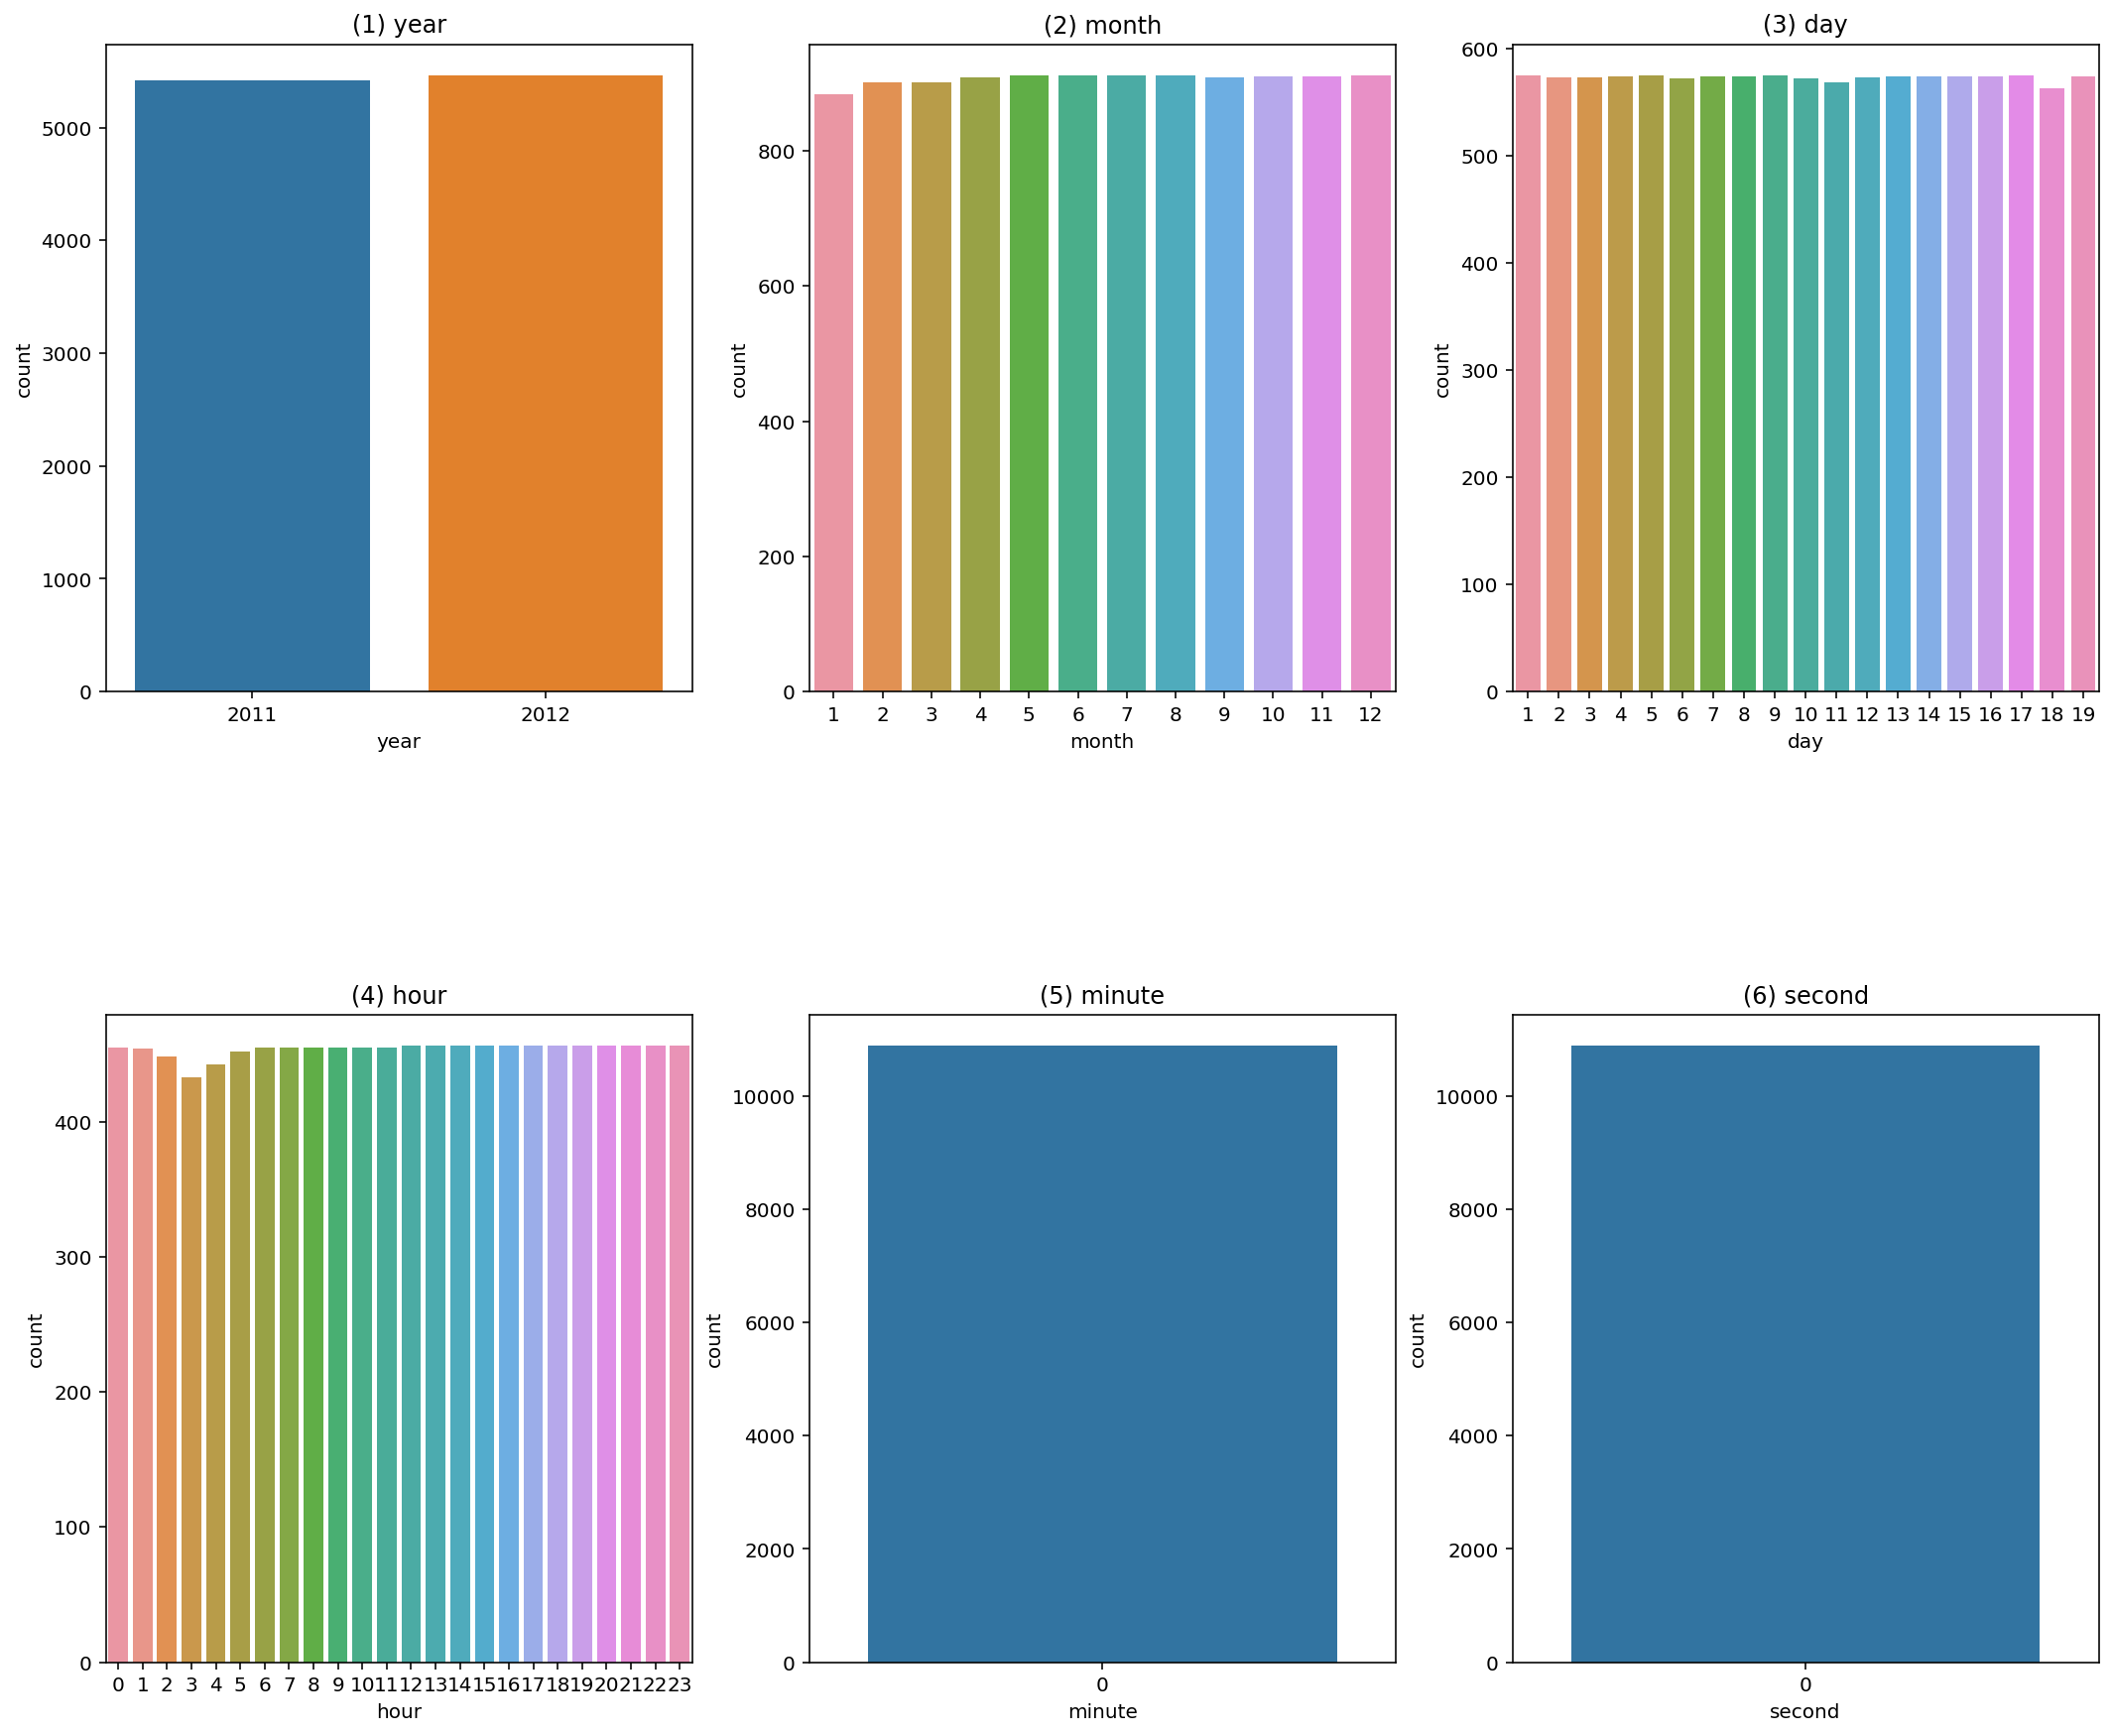

In [153]:
f,ax=plt.subplots(2, 3, figsize=(18,15))
sns.countplot('year', data=bike_df, ax=ax[0,0])
ax[0,0].set_title('(1) year')

sns.countplot('month', data=bike_df, ax=ax[0,1])
ax[0,1].set_title('(2) month')

sns.countplot('day', data=bike_df, ax=ax[0,2])
ax[0,2].set_title('(3) day')

sns.countplot('hour', data=bike_df, ax=ax[1,0])
ax[1,0].set_title('(4) hour')

sns.countplot('minute', data=bike_df, ax=ax[1,1])
ax[1,1].set_title('(5) minute')

sns.countplot('second', data=bike_df, ax=ax[1,2])
ax[1,2].set_title('(6) second')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### (4)X, y 컬럼 선택 및 train/test 데이터 분리

In [154]:
import numpy as np
W = np.random.rand(15)
b = np.random.rand(1)
print(W)
print(b)

[0.03722681 0.12777812 0.76628865 0.07422887 0.33831849 0.36484908
 0.95219158 0.81808212 0.67469903 0.64260408 0.80753189 0.74555329
 0.70382129 0.56603243 0.28160397]
[0.38244101]


In [155]:
drop_columns = ['casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [176]:
X = bike_df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed',	
          'year',	'month',	'day',	'hour',	'minute',	'second']].values
y = bike_df['count'].values

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

슝=3
(8708, 14) (8708,)
(2178, 14) (2178,)


##### (5) LinearRegression 모델 학습

In [165]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [178]:
model.fit(X_train, y_train)

LinearRegression()

##### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [180]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [182]:
from sklearn.metrics import mean_squared_error

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def RMSE(a,b):
    rmse = mse ** 0.5
    return rmse
print(mse)
print(rmse)

19945.370053754086
1265.7484411238715


In [183]:
rmse = RMSE(predictions, y_test)
rmse

141.22807813517142

##### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [169]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


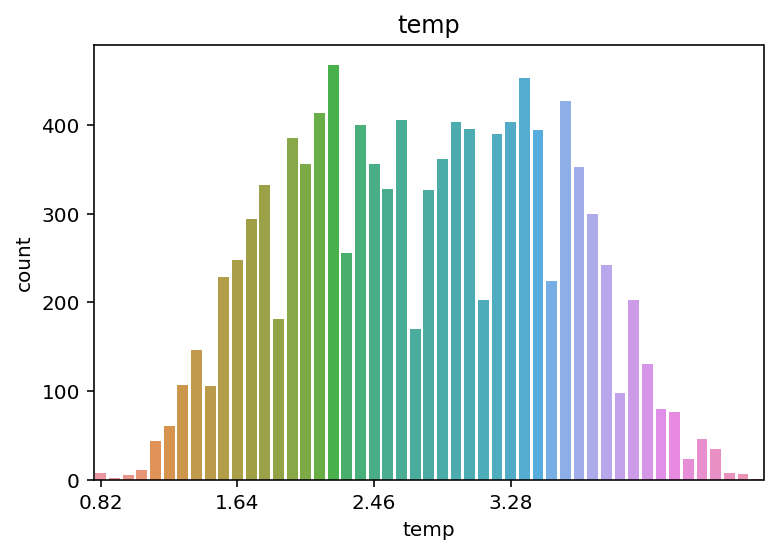

In [170]:
sns.countplot(x="temp", data=bike_df)
plt.title("temp")
plt.xticks(np.arange(0,40,10))

plt.show()

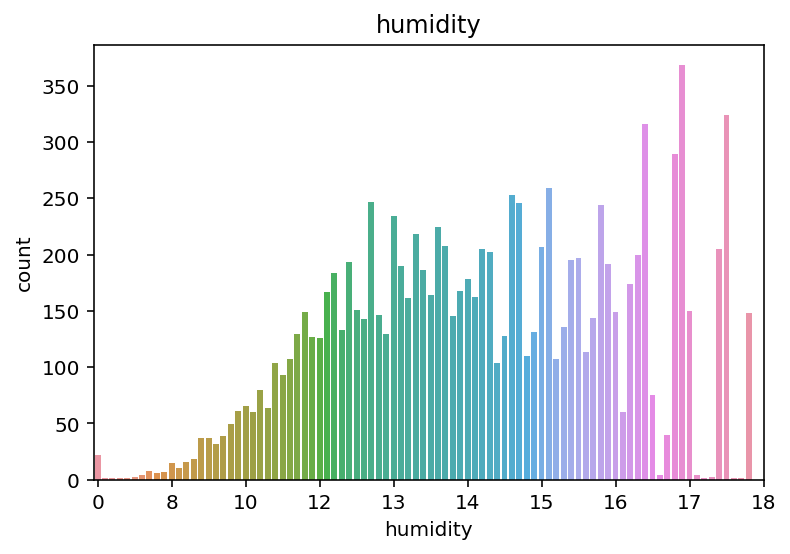

In [171]:
sns.countplot(x="humidity", data=bike_df)
plt.title("humidity")
plt.xticks(np.arange(0,100,10))

plt.show()